# INTRODUCTION
Life Expectancy Calculation using machine learning has emerged as a promising application in the field of healthcare and data science.The GHO and WHO keeps track of the health status as well as many other related factors for all countries.The datasets are made available to public for the purpose of health data analysis.In this project, we will train our models using this dataset.We will be using four machine learning models including 
Linear Regression, Multiple Linear Regression,Polynomial Regression and Multiple Polynomial Regression Model.Through this exploration, we aim to demonstrate the potential of machine learning in improving our understanding of longevity and its implications across various domains.

# SOCIAL BENEFITS
The social benefits of a Life Expectancy Calculation model using machine learning are numerous and impactful.<br>
1.It can bring improvements in healthcare ,economic planning,social services and overall quality of life.<br>
2.By analyzing patterns in historical data,the model can identify risk factors and trends associated with certain diseases or conditions.This can lead to advancements in medicine,genetics,lifestyle interventions and public health strategies.<br>
3.Government and policymakers can utilize life expectancy predictions to make informed decisions about social welfare programs,retirement age policies and workforce planning contributing to a stable and sustainable economy.<br>
4.A better understanding of life expectancy factors can lead to public awareness about healthy lifestyles and behaviours that can positively impact longevity.This promotes healthier living and reduces the burden on healthcare systems.<br>
5.Its potential to empower decision-makers with accurate insights into longevity has the capacity to positively influence multiple aspects of society.

# Importing the libraries
We begin by importing the necessary python libraries required for the machine learning process.

In [110]:
import numpy as np #used for working with arrays.
import pandas as pd #used for working with data sets.
import matplotlib.pyplot as plt #used to create 2D graphs and plots by using python scripts.
import seaborn as sns #used for making statistical graphs.
import warnings #ignore all warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler #for the normalization/standardization.
from sklearn.impute import SimpleImputer #Replace missing values using a descriptive statistic along each column.
from sklearn.preprocessing import LabelEncoder#Encode target labels with value between 0 and n_classes-1.
from sklearn.model_selection import train_test_split #splits the data into random test and train datasets.
from sklearn.linear_model import LinearRegression #least squares Linear Regression.
from sklearn.metrics import mean_squared_error #mean squared error regression loss.
from sklearn.metrics import mean_absolute_error #mean absolute error regression loss.
from sklearn.metrics import r2_score #regression score function.
from sklearn.preprocessing import PolynomialFeatures #Generate polynomial and interaction features.
from sklearn.model_selection import GridSearchCV # Finds the optimal parameter values from a given set of parameters.
from sklearn.model_selection import RepeatedStratifiedKFold
#Repeats Stratified K-Fold n times with different randomization in each repetition.

# EDA and Preprocessing

In [2]:
#reading the dataset and creating a dataframe.
df=pd.read_csv('Life_Expectancy_Data.csv') 

In [3]:
#returns the first five rows.
df.head() 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Describes the size of the dataset.
df.shape 

(2938, 22)

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
#renaming some columns that contain trailing spaces.
df.rename(columns={'Life expectancy ':'Life_Expectancy','Adult Mortality':'Adult_Mortality','infant deaths':'infant_deaths',
'percentage expenditure':'percentage_expenditure','Hepatitis B':'Hepatitis_B','under-five deaths ':'under_five_deaths',
'Total expenditure':'Total_expenditure',' thinness  1-19 years':'thinness_1to19_years',
' thinness 5-9 years':'thinness_5to9_years','Income composition of resources':'Income_composition_of_resources'},inplace=True)

In [7]:
#Checking for the data types of the features.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

## Observation:
1.The data types of all the features are correct.<br>
2.We have two features:'Country' and 'Status' with object data type.<br>
3.We have total 20 featues with float and int data type.

In [8]:
#Checking for the null values.
df.isnull().sum() 

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
 BMI                                34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness_1to19_years                34
thinness_5to9_years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [9]:
fill_list=['Life_Expectancy','Adult_Mortality','Alcohol','Hepatitis_B','Polio','Total_expenditure','GDP','Population',
           'thinness_1to19_years','thinness_5to9_years','Income_composition_of_resources','Schooling']

In [10]:
#Replacing the null value for the mean value of the data.
imputer= SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=None)
for i in fill_list:
    df[i]=imputer.fit_transform(df[[i]])

In [11]:
#Dropping the rest of the values.
df=df.dropna()

In [12]:
#Checking again for the null values.
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
 BMI                               0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness_1to19_years               0
thinness_5to9_years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [13]:
#Checking for the dimensions again.
df.shape

(2896, 22)

## Observation:
Hence the dataset doesn't contain any null value.<br>
2.The data types of all the features are correct.<br>
3.We have our class label:diagnosis of object data type.<br>
4.We have total 31 featues with float data type.

In [14]:
#generating descriptive statistics.
df.describe()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_composition_of_resources,Schooling
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2.896000e+03,2896.000000,2896.000000,2896.000000,2896.000000
mean,2007.530387,69.349033,163.361316,30.231008,4.633085,747.861686,80.988171,2435.767265,38.307217,41.869820,82.672652,5.939985,82.438881,1.745235,7553.018440,1.280808e+07,4.839641,4.870200,0.632379,12.101531
std,4.609569,9.482314,123.847482,118.737950,3.929654,2000.613201,22.651802,11546.049197,20.047346,161.534748,23.350137,2.405360,23.664313,5.110210,13214.566211,5.418178e+07,4.420765,4.509682,0.200178,3.120147
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.500000,73.000000,0.000000,1.100000,5.000265,80.940461,0.000000,19.300000,0.000000,78.000000,4.377500,78.000000,0.100000,582.012686,4.158228e+05,1.600000,1.500000,0.513000,10.400000
50%,2008.000000,72.100000,143.000000,3.000000,4.160000,67.655779,87.000000,17.000000,43.400000,4.000000,93.000000,5.934095,93.000000,0.100000,3160.058115,3.720414e+06,3.300000,3.350000,0.666000,12.200000
75%,2012.000000,75.700000,225.000000,21.000000,7.467500,450.021056,96.000000,351.250000,56.200000,26.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.200000,7.200000,0.774000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Visualization of the data
Now,since our dataset is clean,we visulaize it to generate more results.

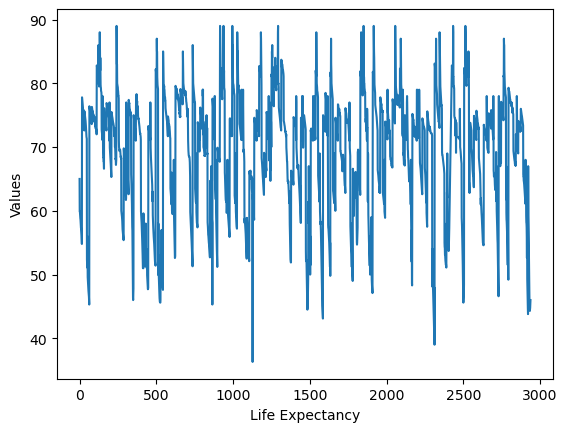

In [15]:
#plt.figure(figsize=(10))
plt.plot(df['Life_Expectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Values')
plt.show()

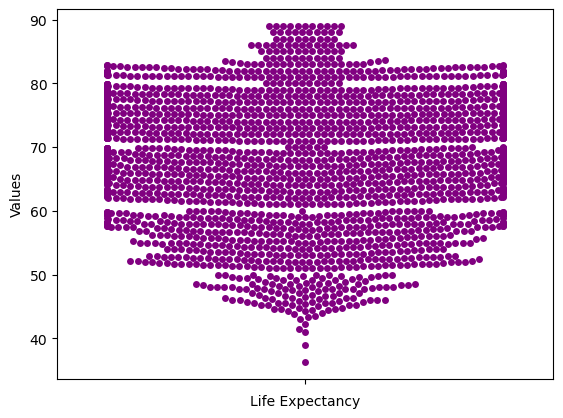

In [16]:
sns.swarmplot(df['Life_Expectancy'], color='purple')
plt.xlabel('Life Expectancy')
plt.ylabel('Values')
plt.show()

## Observation:
From the above swarmplot, it is observed that the life expectancies values are more between 55-85 years.

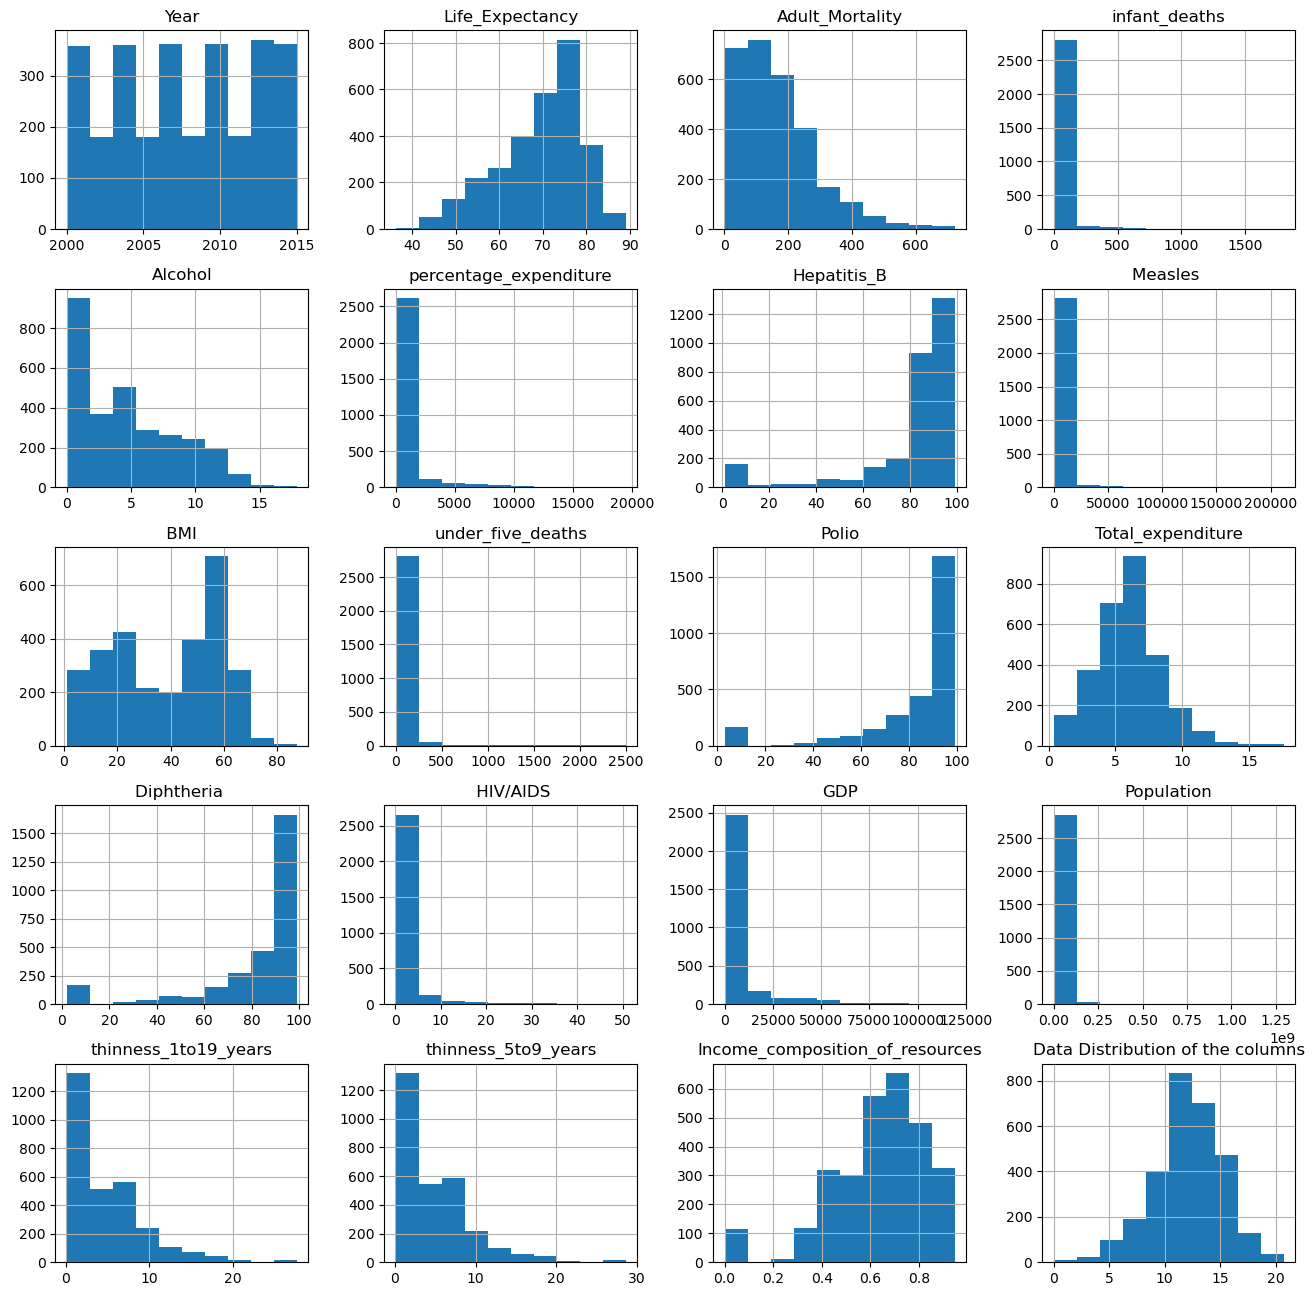

In [17]:
#Plotting the histograms for all the features.
df.hist(bins=10, figsize=(16,16))
plt.title('Data Distribution of the columns')
plt.show()

In [18]:
df.corr()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.170395,-0.079941,-0.038071,-0.051254,0.030810,0.089763,-0.083725,0.109665,-0.043545,0.095939,0.081251,0.136184,-0.142035,0.093468,0.013810,-0.047510,-0.050563,0.232691,0.201919
Life_Expectancy,0.170395,1.000000,-0.693189,-0.197381,0.393775,0.381127,0.204816,-0.160507,0.563822,-0.223142,0.463197,0.206551,0.477221,-0.560290,0.431251,-0.020903,-0.475719,-0.470137,0.693361,0.722388
Adult_Mortality,-0.079941,-0.693189,1.000000,0.078697,-0.190060,-0.241036,-0.140281,0.032578,-0.384245,0.093837,-0.270982,-0.108774,-0.271463,0.526698,-0.276107,-0.011763,0.301721,0.307290,-0.433674,-0.428625
infant_deaths,-0.038071,-0.197381,0.078697,1.000000,-0.113970,-0.085491,-0.179150,0.501176,-0.227373,0.996636,-0.171263,-0.126676,-0.175607,0.025501,-0.106882,0.548625,0.466308,0.471936,-0.148137,-0.201158
Alcohol,-0.051254,0.393775,-0.190060,-0.113970,1.000000,0.338769,0.075217,-0.051729,0.320254,-0.110747,0.214400,0.298531,0.215765,-0.051230,0.316824,-0.031008,-0.418948,-0.407793,0.420169,0.511212
percentage_expenditure,0.030810,0.381127,-0.241036,-0.085491,0.338769,1.000000,0.010934,-0.057147,0.229084,-0.087597,0.146544,0.173808,0.142851,-0.098099,0.888287,-0.025061,-0.251589,-0.253113,0.383989,0.397364
Hepatitis_B,0.089763,0.204816,-0.140281,-0.179150,0.075217,0.010934,1.000000,-0.091318,0.135680,-0.184709,0.410481,0.048302,0.502213,-0.103106,0.061468,-0.110902,-0.105732,-0.108935,0.153820,0.177260
Measles,-0.083725,-0.160507,0.032578,0.501176,-0.051729,-0.057147,-0.091318,1.000000,-0.176054,0.507919,-0.137512,-0.104778,-0.143048,0.031186,-0.068496,0.236202,0.225106,0.221357,-0.122860,-0.133516
BMI,0.109665,0.563822,-0.384245,-0.227373,0.320254,0.229084,0.135680,-0.176054,1.000000,-0.237775,0.284569,0.230783,0.283147,-0.243822,0.277573,-0.063178,-0.530967,-0.537893,0.496200,0.537821
under_five_deaths,-0.043545,-0.223142,0.093837,0.996636,-0.110747,-0.087597,-0.184709,0.507919,-0.237775,1.000000,-0.189234,-0.128284,-0.196053,0.038365,-0.110272,0.536012,0.468391,0.472852,-0.165904,-0.216323


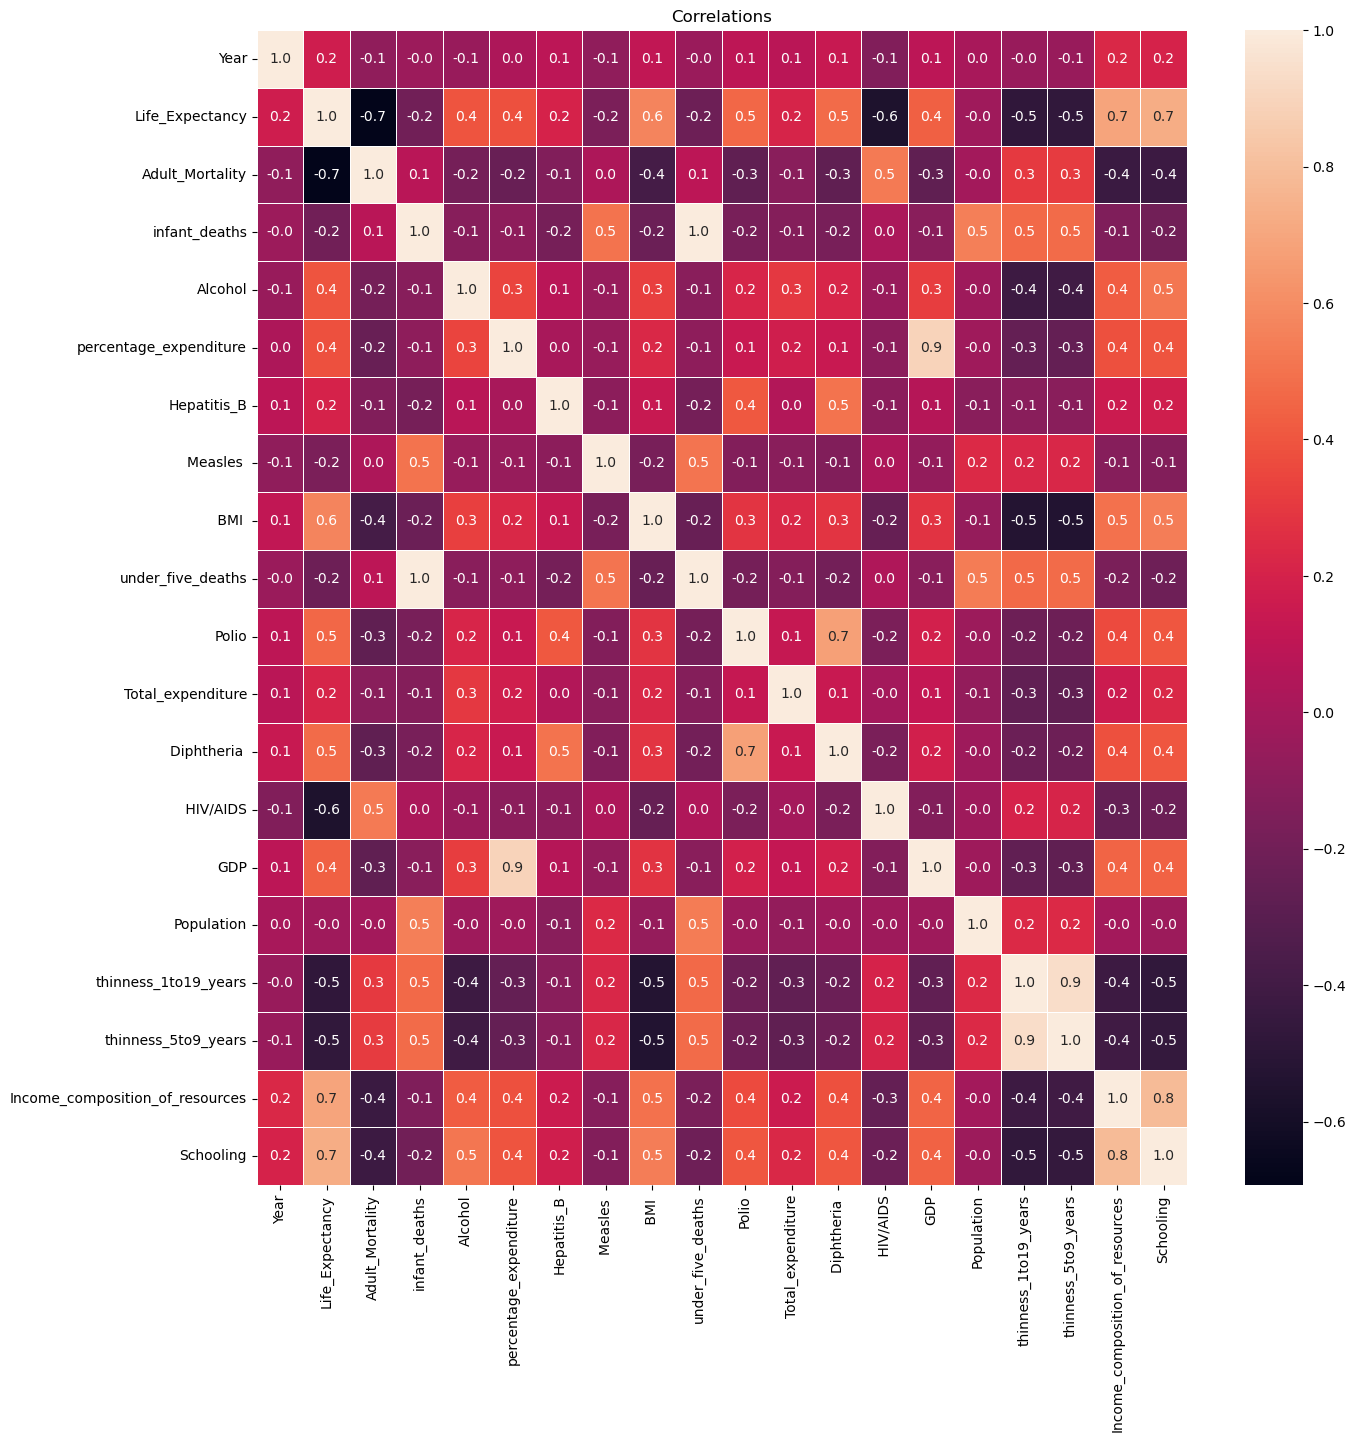

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlations")
plt.show()

## Observation:
It seems from the heatmap,the features **under_five_deaths** and **infant_deaths** are correlated.We use **jointplot** to verify on this conclusion.

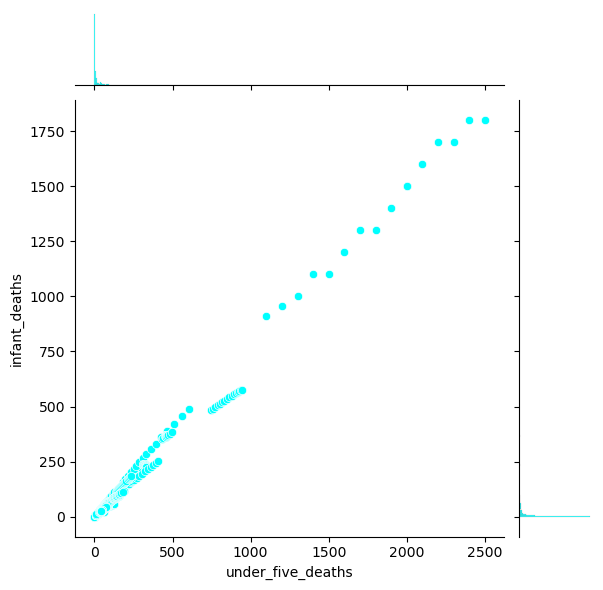

In [20]:
#under_five_deaths vs infant_deaths
sns.jointplot(x=df['under_five_deaths'] , y =df['infant_deaths'] ,color='cyan')
plt.show()

The corrrelation among them is verified and thus, we remove one of them.

In [21]:
df=df.drop('under_five_deaths',axis=1)

### Seeing the impact of the features that are highly correlated with Life Expectancy.

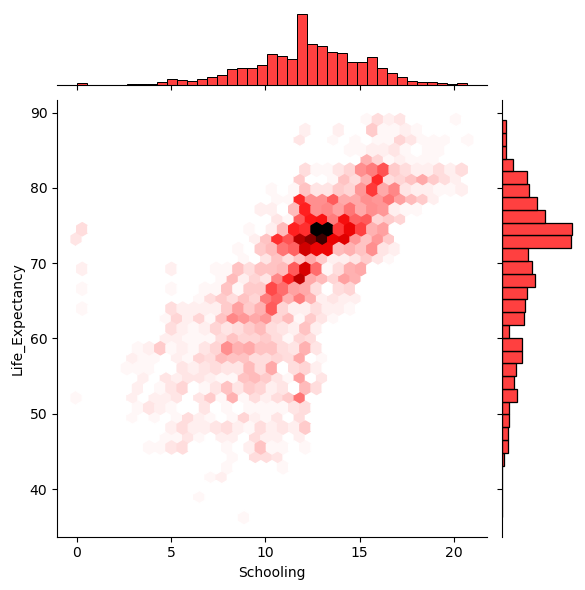

In [22]:
#Schooling vs Life Expectancy
sns.jointplot(x=df['Schooling'], y=df['Life_Expectancy'],kind="hex", color='r')
plt.show()

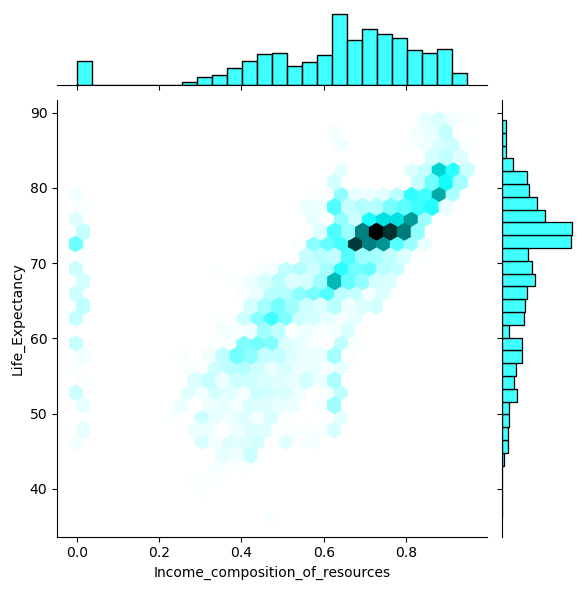

In [23]:
#Income Composition of Resources vs Life Expectancy
sns.jointplot(x=df['Income_composition_of_resources'],kind='hex', y=df['Life_Expectancy'], color='cyan')
plt.show()

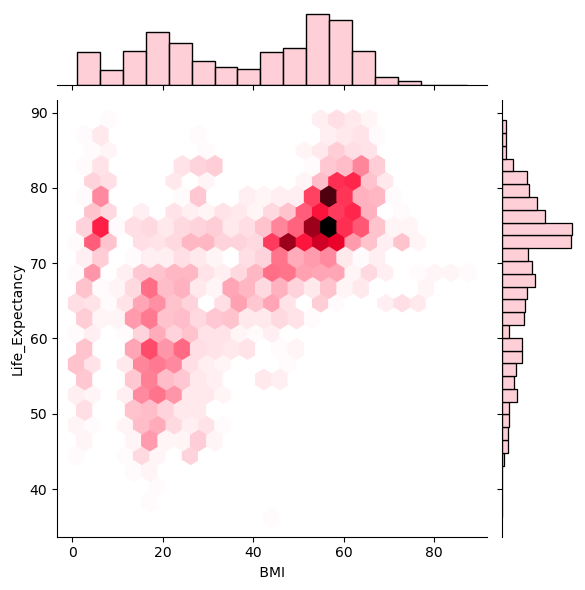

In [24]:
#BMI vs Life Expectancy
sns.jointplot(x=df[' BMI '], y=df['Life_Expectancy'],kind="hex", color='pink')
plt.show()

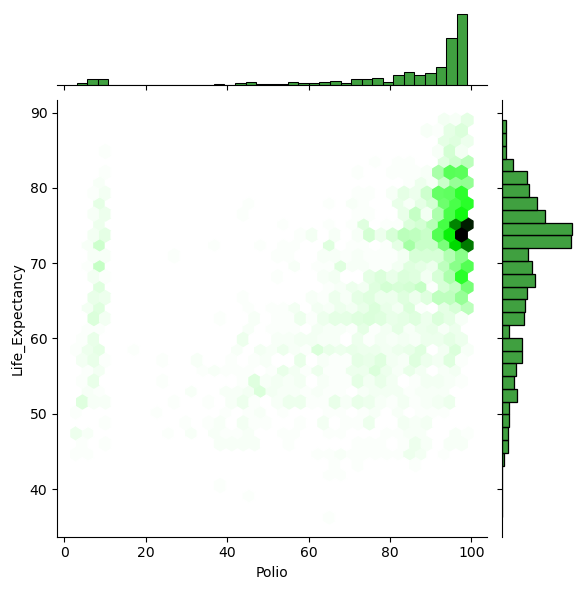

In [25]:
#Polio vs Life Expectancy
sns.jointplot(x=df['Polio'], y=df['Life_Expectancy'],kind="hex", color='green')
plt.show()

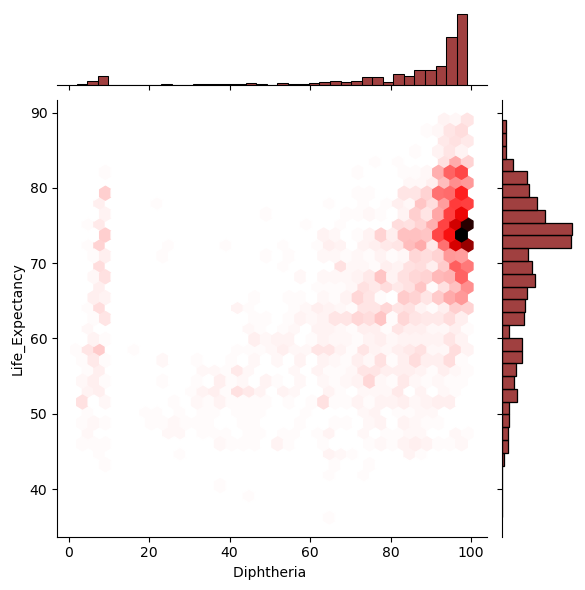

In [26]:
#Diphtheria vs Life Expectancy
sns.jointplot(x=df['Diphtheria '], y=df['Life_Expectancy'],kind="hex", color='maroon')
plt.show()

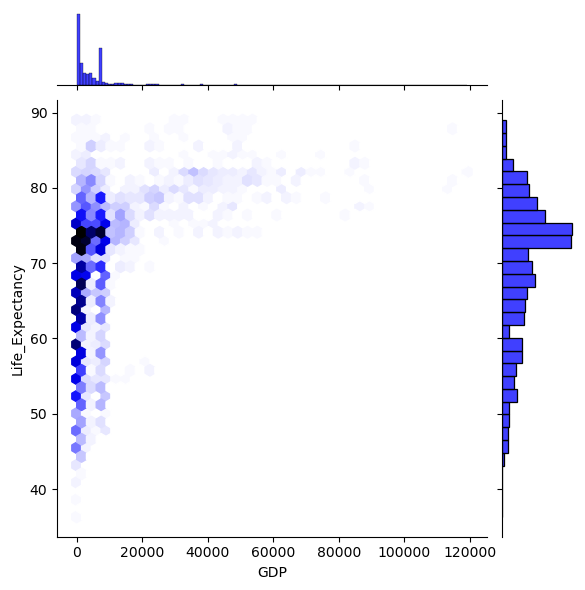

In [27]:
#GDP vs Life Expectancy
sns.jointplot(x=df['GDP'], y=df['Life_Expectancy'],kind="hex", color='blue')
plt.show()

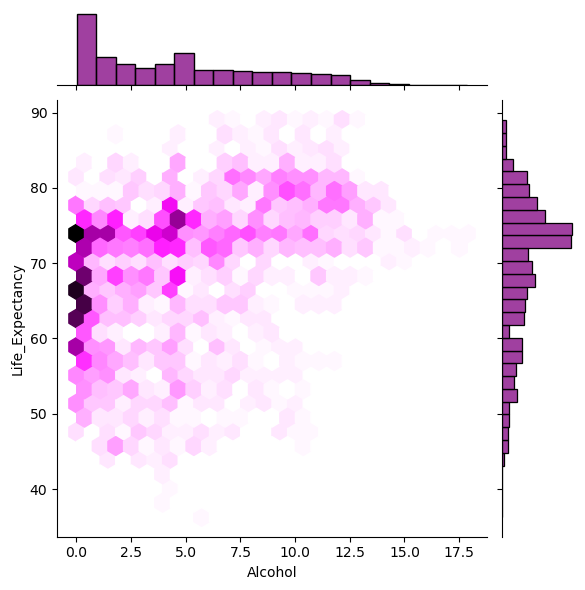

In [28]:
#Alcohol vs Life Expectancy
sns.jointplot(x=df['Alcohol'], y=df['Life_Expectancy'],kind="hex", color='purple')
plt.show()

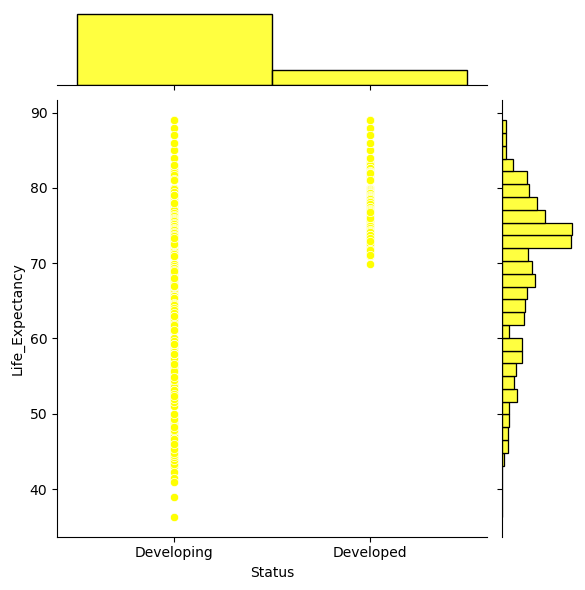

In [29]:
# Seeing the impact of Status on Life Expectancy
sns.jointplot(x=df['Status'] , y =df['Life_Expectancy'] ,color='yellow')
plt.show()

## Observation:
It can be observed from the above plot that the Developed countries have higher Life Expectancies than Developing countries.

# Label Encoding
Changing the inputs in string data type to numerical values for further processing.

In [30]:
le=LabelEncoder() #Creating label Encoder Object.

In [31]:
df['Status']=le.fit_transform(df['Status'])

In [32]:
df['Country']=le.fit_transform(df['Country'])

# Regression Models:
I am using both the **linear regression and polynomial regression** models with single and multiple inputs for the prediction. 

# LINEAR REGRESSION
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and an independent features. The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables. 

Since the **Schooling** feature is the highest correlated feature,we will use this feature for single input Linear Regression.

### X-Y or Input-Output Split: 
Here, we split the data into two parts: the input features and the results to be predicted.

In [33]:
X=df.Schooling

In [34]:
X=X.values.reshape(-1,1)

In [35]:
Y=df['Life_Expectancy']

In [36]:
lr=LinearRegression() # Creating LinearRegression Object

### Test and Train Split:
We need to split our data into data for testing and training.Approximately, 30% of the data is used for testing purpose and the remaining for training.

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
 #If we don't pass random_state , it will produce different random data each time we run it.

In [38]:
model=lr.fit(X_train,Y_train) #Creating the model and fitting the data.

In [39]:
Y_pred=model.predict(X_test)

In [40]:
model.intercept_ #Gives the intercept of the regression line.

43.47140893040671

In [41]:
model.coef_  #Since there is 1 input feature ,we have 1 coefficients.

array([2.14973992])

### Analysis:

In [42]:
mean_absolute_error(Y_test,Y_pred) #mean absolute error for the regression.

4.894695845018704

In [43]:
mean_squared_error(Y_test,Y_pred) #mean squared error regression loss.

44.87097063914018

In [44]:
r2_score(Y_test,Y_pred) #regression score function.

0.5201467359797662

#### Observation:
The best possible score is:1,the r2_score for the given model is:0.52.The more close the value is to 1,the more good is the model.

### Optimization:

In [45]:
f=[True,False]
c=[True,False]

In [46]:
#Creating Search Space
search_space={'fit_intercept':f,'copy_X':c}

In [47]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=3)

In [48]:
base_model=LinearRegression()

In [49]:
search = GridSearchCV(estimator=base_model, scoring='r2' ,param_grid =search_space)

In [50]:
results=search.fit(X_train,Y_train)

In [51]:
results.best_params_ #gives the optimized parameters

{'copy_X': True, 'fit_intercept': True}

In [52]:
results.best_score_  #gives the best regression score.

0.5165616987197703

# MULTIVARIATE LINEAR REGRESSION
Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable. In Multiple Linear Regression, the target variable(Y) is a linear combination of multiple predictor variables x1, x2, x3, ...,xn. 

### X-Y or Input-Output Spilt:
Here,we have total 20 input features.

In [53]:
X_multi=df.drop('Life_Expectancy' , axis=1)

In [54]:
Y=df['Life_Expectancy']

### Test and Train Split:


In [55]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_multi,Y,test_size=0.3,random_state=42)

In [56]:
model_1=lr.fit(X1_train,Y1_train) #Creating the model and fitting the data.

In [57]:
Y1_pred=model_1.predict(X1_test)

In [58]:
model_1.intercept_ #Gives the intercept of the regression line.

79.41981169249476

In [59]:
model_1.coef_  #Since there are 20 input features ,we have 20 coefficients.

array([ 2.71368846e-03, -1.20152847e-02, -1.43506267e+00, -2.00717481e-02,
       -5.84014216e-04,  3.17473736e-02,  7.51763588e-05, -1.60388896e-02,
       -3.75302287e-05,  3.60014015e-02,  2.50245855e-02,  3.63529573e-02,
        4.78545827e-02, -5.06711848e-01,  2.74120315e-05,  2.33236871e-09,
       -7.45458178e-02, -4.05828240e-03,  7.38887032e+00,  6.85062695e-01])

### Analysis:

In [60]:
mean_absolute_error(Y1_test,Y1_pred) #mean absolute error for the regression.

3.1311215649481494

In [61]:
mean_squared_error(Y1_test,Y1_pred) #mean squared error regression loss.

17.822648222841813

In [62]:
r2_score(Y1_test,Y1_pred) #regression score function.

0.8094033670010455

#### Observation:
The best possible score is:1,the r2_score for the given model is:0.809.

### Optimization:

In [63]:
search_space

{'fit_intercept': [True, False], 'copy_X': [True, False]}

In [64]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=3)

In [65]:
base_model=LinearRegression()

In [66]:
search1 = GridSearchCV(estimator=base_model, scoring='r2' ,param_grid =search_space)

In [67]:
results1=search1.fit(X1_train,Y1_train)

In [68]:
results1.best_params_ #gives the optimized parameters

{'copy_X': True, 'fit_intercept': True}

In [69]:
results1.best_score_ #gives the best regression score.

0.8064494646470642

# POLYNOMIAL REGRESSION
Polynomial Regression is a regression algorithm that models the relationship between a dependent(Y) and independent variable(x) as nth degree polynomial. For cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. 

For Single input polynomial regression,we use the **Income_composition_of_resources** feature based on it's correlation with our target variable.

### X-Y or Input-Output Spilt:

In [70]:
x=df['Income_composition_of_resources']

In [71]:
x=x.values.reshape(-1,1)

In [72]:
poly=PolynomialFeatures()

In [73]:
poly_x=poly.fit_transform(x)

In [74]:
y=df['Life_Expectancy']

### Test and Train Split:

In [75]:
x_train,x_test,y_train,y_test=train_test_split(poly_x,y, test_size=0.3, random_state=8)

In [76]:
model_2=lr.fit(x_train,y_train) #Creating the model and fitting the data.

In [77]:
y_pred=model_2.predict(x_test)

In [78]:
model_2.intercept_ 

60.61672479851613

In [79]:
model_2.coef_

array([  0.        , -27.16902004,  58.96174225])

### Analysis:

In [80]:
mean_absolute_error(y_test,y_pred) #mean absolute error for the regression.

4.171212608539353

In [81]:
mean_squared_error(y_test,y_pred) #mean squared error regression loss.

32.65191144494093

In [82]:
r2_score(y_test,y_pred) #regression score function.

0.6360086370921376

#### Observation:
The best possible score is:1,the r2_score for the given model is:0.636.

### Optimization:

In [83]:
search_space

{'fit_intercept': [True, False], 'copy_X': [True, False]}

In [84]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=3)

In [85]:
base_model=LinearRegression()

In [86]:
search2 = GridSearchCV(estimator=base_model, scoring='r2' ,param_grid =search_space)

In [87]:
results2=search2.fit(x_train,y_train)

In [88]:
results2.best_params_

{'copy_X': True, 'fit_intercept': True}

In [89]:
results2.best_score_

0.6521080037137469

# MULTIVARIATE POLYNOMIAL REGRESSION
Multivariate polynomial regression is used to model complex relationships with multiple variables. In this technique, the relationship is modelled as a polynomial function of the independent variables, allowing for more complex and nonlinear relationships to be captured.

### X-Y or Input-Output Split:

In [90]:
X_multi

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_composition_of_resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,188,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,188,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,188,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,188,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [91]:
poly=PolynomialFeatures()

In [92]:
poly_x1=poly.fit_transform(X_multi)

In [93]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 2896, dtype: float64

### Test and Train Split:

In [94]:
x1_train,x1_test,y1_train,y1_test=train_test_split(poly_x1,y, test_size=0.3, random_state=8)

In [95]:
model_3=lr.fit(x1_train,y1_train) # Creating the model and fitting the data.

In [96]:
y1_pred=model_3.predict(x1_test)

In [97]:
model_3.intercept_

88.5857908882644

In [98]:
model_3.coef_

array([-6.34299713e-04, -2.07036011e-05, -2.75336619e-07, -2.05070384e-07,
        6.86269235e-05,  1.02816178e-05, -2.36712716e-06, -1.95487144e-03,
       -5.27803469e-06,  9.98286012e-04, -7.57397656e-06, -7.67470568e-06,
       -8.69676627e-07, -7.79949822e-06,  8.65250728e-07, -1.50850040e-02,
        1.16474873e-06,  1.51590974e-06,  1.31028810e-06,  1.71977465e-06,
       -2.47686518e-06,  2.67876149e-05, -1.60039105e-06,  8.52338932e-04,
        1.08465714e-05, -4.65799577e-05,  2.09498531e-03, -1.76771039e-06,
       -1.27355133e-04, -7.65671272e-08, -1.66612774e-04,  6.17141618e-05,
       -3.56010783e-04, -8.14094818e-05, -2.21012005e-04, -5.34614215e-08,
        1.36441948e-10, -2.08298129e-04,  1.33781119e-03,  5.99966411e-04,
        5.85575044e-04, -9.92654254e-06, -1.01102778e-03,  2.76478453e-05,
        1.75877878e-06,  5.33839309e-06,  4.86732324e-06,  1.19689017e-06,
       -5.75256023e-07,  1.17358928e-04, -2.91776499e-05, -4.94933625e-04,
        2.47603987e-05, -

### Analysis:

In [99]:
mean_absolute_error(y1_test,y1_pred) #mean absolute error for the regression.

2.222364497950129

In [100]:
mean_squared_error(y1_test,y1_pred)  #mean squared error regression loss.

9.590826567313753

In [101]:
r2_score(y1_test,y1_pred) #regression score function.

0.8930850330298088

#### Observation:
The best possible score is:1,the r2_score for the given model is:0.893 and the best r2 score till now.

### Optimization:

In [102]:
search_space

{'fit_intercept': [True, False], 'copy_X': [True, False]}

In [103]:
cv= RepeatedStratifiedKFold(n_repeats=1,n_splits=5)

In [104]:
base_model=LinearRegression()

In [105]:
search3 = GridSearchCV(estimator=base_model, scoring='r2' ,param_grid =search_space)

In [106]:
results3=search3.fit(x1_train,y1_train)

In [107]:
results3.best_params_

{'copy_X': True, 'fit_intercept': True}

In [108]:
results3.best_score_

0.7960050929089826

# Conclusion:
**The analysis of life expectancy using all the four models shows that the Multivariate Polynomial Regression model achieved the highest R-squared(r2) score(0.89) among the models. This implies that considering multiple variables and using a polynomial relationship improved the accuracy of the predictions and results in a more comprehensive representation of the underlying relationships affecting Life Expectancy as compared to the other models.**